# Підготовка та Аналіз даних
## Лабораторна робота №6
## Застосування numpy
<b>Мета роботи</b>: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.
#### ФБ-23 Хоменко Гліб

Оцінка параметрів методом МНК: k = 1.9540226772876972, b = 5.215096157546746
Оцінка параметрів за допомогою np.polyfit: k = 1.9540226772876979, b = 5.215096157546751
Відносна похибка для методу МНК: k = 2.2988661356151407%, b = 4.301923150934925%
Відносна похибка для np.polyfit: k = 2.2988661356151074%, b = 4.301923150935014%


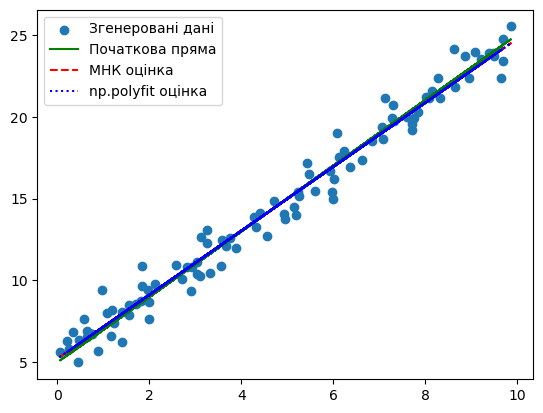

In [48]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(100) * 10
y = 2.0 * x + 5.0 + np.random.randn(100)

def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    S_xy = np.sum((x - x_mean) * (y - y_mean))
    S_xx = np.sum((x - x_mean) ** 2)
    
    k = S_xy / S_xx
    b = y_mean - k * x_mean
    
    return k, b



k_hat, b_hat = least_squares(x, y)
p = np.polyfit(x, y, 1)
k_polyfit, b_polyfit = p

relative_error_k_hat = np.abs((k_hat - 2) / 2) * 100
relative_error_b_hat = np.abs((b_hat - 5) / 5) * 100

relative_error_k_polyfit = np.abs((k_polyfit - 2) / 2) * 100
relative_error_b_polyfit = np.abs((b_polyfit - 5) / 5) * 100

print(f'Оцінка параметрів методом МНК: k = {k_hat}, b = {b_hat}')
print(f'Оцінка параметрів за допомогою np.polyfit: k = {k_polyfit}, b = {b_polyfit}')

print(f'Відносна похибка для методу МНК: k = {relative_error_k_hat}%, b = {relative_error_b_hat}%')
print(f'Відносна похибка для np.polyfit: k = {relative_error_k_polyfit}%, b = {relative_error_b_polyfit}%')
plt.scatter(x, y, label='Згенеровані дані')

plt.plot(x, 2.0 * x + 5.0, color='green', label='Початкова пряма')

plt.plot(x, k_hat * x + b_hat, color='red', linestyle='--', label='МНК оцінка')

plt.plot(x, k_polyfit * x + b_polyfit, color='blue', linestyle=':', label='np.polyfit оцінка')

plt.legend()
plt.show()


Зупинка на ітерації 593, похибка -9.991093524897021e-05 менше заданого 0.0001
Оцінка параметрів методом градієнтного спуску: k = 1.9812842017179926, b = 5.037725786793665
Відносна похибка для методу градієнтного спуску: k = 0.9357899141003712%, b = 0.7545157358732979%


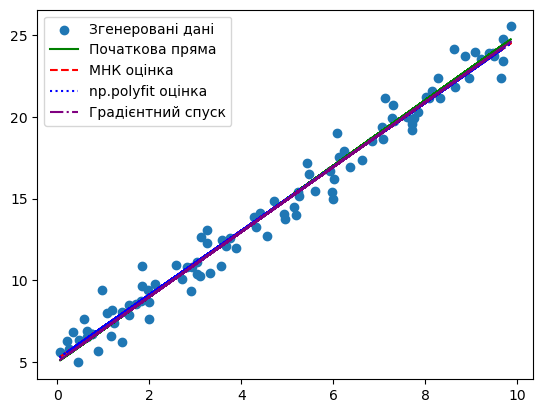

In [70]:
def gradient_descent(x, y, learning_rate, n_iter, epsilon):
    n = len(x)
    k = 0.0
    b = 0.0
    error_history = []

    for i in range(n_iter):
        y_pred = k * x + b
        error = (1 / n) * np.sum((y - y_pred) ** 2)
        if i > 1:
            error_history_last = error_history[-1]
            if np.abs(error - error_history_last) < epsilon:
                print(f'Зупинка на ітерації {i}, похибка {error - error_history_last} менше заданого {epsilon}')
                break
        error_history.append(error)
        dk = -(2 / n) * np.sum(x * (y - y_pred))
        db = -(2 / n) * np.sum(y - y_pred)
        
        k = k - learning_rate * dk
        b = b - learning_rate * db
    
    return k, b, error_history

learning_rate = 0.01
n_iter = 1000
epsilon = 0.0001

k_gd, b_gd, error_history = gradient_descent(x, y, learning_rate, n_iter, epsilon)
print(f'Оцінка параметрів методом градієнтного спуску: k = {k_gd}, b = {b_gd}')

relative_error_k_gradient = np.abs((k_gd - 2) / 2) * 100
relative_error_b_gradient = np.abs((b_gd - 5) / 5) * 100
print(f'Відносна похибка для методу градієнтного спуску: k = {relative_error_k_gradient}%, b = {relative_error_b_gradient}%')

plt.scatter(x, y, label='Згенеровані дані')

plt.plot(x, 2.0 * x + 5.0, color='green', label='Початкова пряма')

plt.plot(x, k_hat * x + b_hat, color='red', linestyle='--', label='МНК оцінка')

plt.plot(x, k_polyfit * x + b_polyfit, color='blue', linestyle=':', label='np.polyfit оцінка')

plt.plot(x, k_gd * x + b_gd, color='purple', linestyle='-.', label='Градієнтний спуск')

plt.legend()
plt.show()

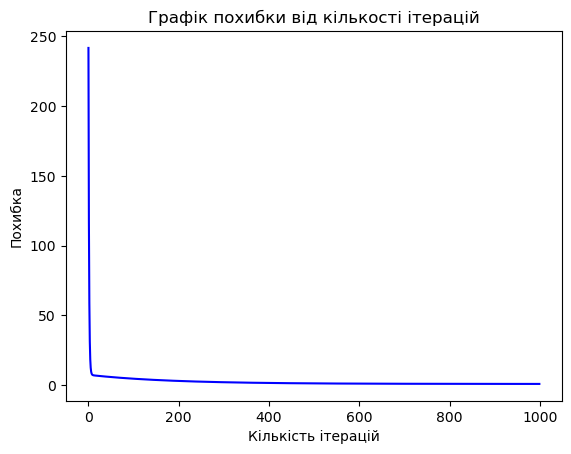

In [27]:
plt.plot(range(n_iter), error_history, color='blue')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Графік похибки від кількості ітерацій')
plt.show()